In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import os


In [3]:
cats = ['E:/vscode/datasciences/catanddogs/cats_dogs/train/cat/' + i for i in os.listdir('E:/vscode/datasciences/catanddogs/cats_dogs/train/cat') ]
dogs = ['E:/vscode/datasciences/catanddogs/cats_dogs/train/dog/' + i for i in os.listdir('E:/vscode/datasciences/catanddogs/cats_dogs/train/dog') ]


In [4]:
d = pd.DataFrame(columns=['target','filepath'])
d['filepath'] = cats
d['target'] = 'cats'

dd = pd.DataFrame(columns=['target','filepath'])
dd['filepath'] = dogs
dd['target'] = 'dogs'

In [5]:
data = pd.concat([d,dd], ignore_index=False)
data= data.sample(frac=1,ignore_index=True)
data

,target,filepath
0,dogs,E:/vscode/datasciences/catanddogs/cats_dogs/tr...
1,dogs,E:/vscode/datasciences/catanddogs/cats_dogs/tr...
2,dogs,E:/vscode/datasciences/catanddogs/cats_dogs/tr...
3,dogs,E:/vscode/datasciences/catanddogs/cats_dogs/tr...
4,cats,E:/vscode/datasciences/catanddogs/cats_dogs/tr...
...,...,...
205,cats,E:/vscode/datasciences/catanddogs/cats_dogs/tr...
206,cats,E:/vscode/datasciences/catanddogs/cats_dogs/tr...
207,cats,E:/vscode/datasciences/catanddogs/cats_dogs/tr...
208,dogs,E:/vscode/datasciences/catanddogs/cats_dogs/tr...


In [6]:
filepaths = data['filepath']


In [7]:
names = data['target'].to_numpy()

uni= np.unique(names)

unique_names= [k == uni for k in names]

In [8]:
import librosa
import librosa.display

Text(22.347222222222214, 0.5, 'Title')

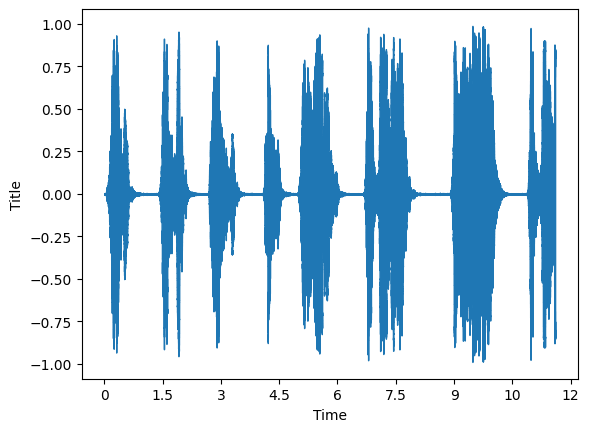

In [9]:
#waveform
signal, sr =librosa.load(filepaths[13], sr=22050)

librosa.display.waveshow(signal,sr=sr)
plt.xlabel("Time")
plt.ylabel("Title")

# fft 

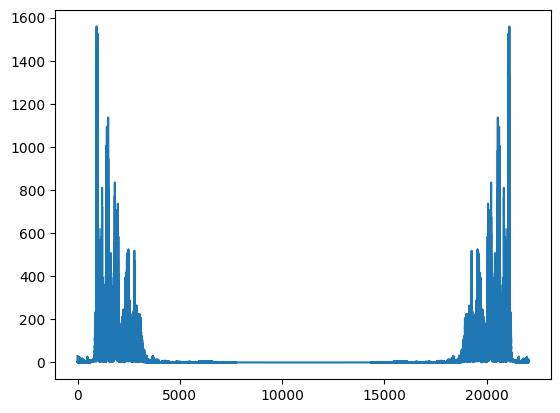

In [10]:
fft= np.fft.fft(signal)

magnitude= np.abs(fft)
frequency = np.linspace(0,sr,len(magnitude))

plt.plot(frequency, magnitude)

# stft

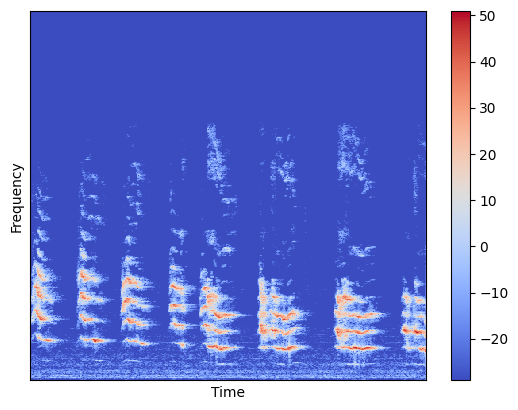

In [11]:
n_fft= 2048
hop_length= 512
stft= librosa.core.stft(signal,hop_length=hop_length, n_fft=n_fft)

spectrogram= np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spectrogram,sr=sr,hop_length=hop_length)

plt.xlabel("Time")
plt.ylabel('Frequency')
plt.colorbar()
plt.show()


# MFCCs

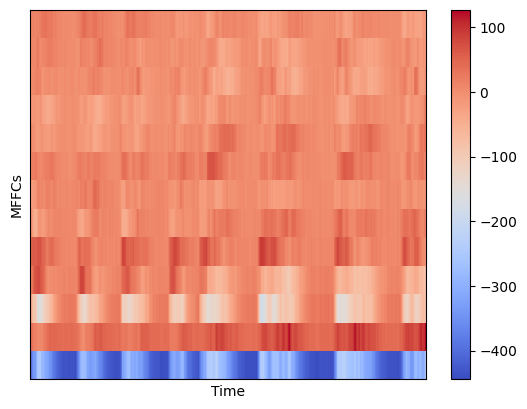

In [12]:
MFFCs= librosa.feature.mfcc(y=signal,n_mfcc=13)

librosa.display.specshow(MFFCs,sr=sr,hop_length=hop_length)

plt.xlabel("Time")
plt.ylabel('MFFCs')
plt.colorbar()
plt.show()

In [13]:
data

,target,filepath
0,dogs,E:/vscode/datasciences/catanddogs/cats_dogs/tr...
1,dogs,E:/vscode/datasciences/catanddogs/cats_dogs/tr...
2,dogs,E:/vscode/datasciences/catanddogs/cats_dogs/tr...
3,dogs,E:/vscode/datasciences/catanddogs/cats_dogs/tr...
4,cats,E:/vscode/datasciences/catanddogs/cats_dogs/tr...
...,...,...
205,cats,E:/vscode/datasciences/catanddogs/cats_dogs/tr...
206,cats,E:/vscode/datasciences/catanddogs/cats_dogs/tr...
207,cats,E:/vscode/datasciences/catanddogs/cats_dogs/tr...
208,dogs,E:/vscode/datasciences/catanddogs/cats_dogs/tr...


# Convert labels

In [14]:
from sklearn.preprocessing  import LabelEncoder, LabelBinarizer
labels = []

le = LabelEncoder()
lb = LabelBinarizer()

bb = le.fit_transform(data['target'])
labels= bb.tolist()


In [77]:
me=lb.fit_transform(data['target'])

In [79]:
yy= to_categorical(me)

In [81]:
me.shape

(210, 1)

In [82]:
yy.shape

(210, 2)

In [64]:
import array as ar

back = le.inverse_transform(labels[:1])
back

array(['dogs'], dtype=object)

In [16]:
bb

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

# DATA PREPROCESSING

# Extract Melsprectum

In [17]:
feature = []
for  i in range(len(data['filepath'])):# Load filepath
    original_audio, sample_rate = librosa.load(data['filepath'][i])
        # Extract Melspectogram
    mels = np.mean(librosa.feature.melspectrogram(y=original_audio,sr= sample_rate).T,axis=0)
        # Append to feature
    feature.append(mels)
    
    # Labels
    


#

In [18]:
feature

[array([1.23546855e-03, 8.41542147e-04, 1.04450667e-03, 1.73454767e-03,
        1.76842231e-02, 3.75928730e-02, 2.65166819e-01, 1.37278870e-01,
        5.39485700e-02, 1.22827239e-01, 1.14503257e-01, 1.77152425e-01,
        1.98871180e-01, 2.41027489e-01, 9.64153826e-01, 1.55121982e+00,
        4.21113968e+00, 9.73074150e+00, 5.21044807e+01, 2.17622543e+02,
        9.99563904e+01, 1.73381210e+02, 5.49937439e+01, 4.77084885e+01,
        5.89371147e+01, 1.79656181e+01, 1.81125469e+01, 1.35098495e+01,
        2.57822685e+01, 6.36120415e+01, 6.31953583e+01, 1.12693848e+02,
        1.68204803e+02, 5.37140732e+01, 1.88899212e+01, 2.72642708e+01,
        2.53219070e+01, 2.57046452e+01, 1.97154140e+01, 1.30614767e+01,
        7.20894575e+00, 4.04932594e+00, 5.19414711e+00, 6.28559160e+00,
        5.53244162e+00, 4.39941216e+00, 4.69871521e+00, 4.62885475e+00,
        3.59021759e+00, 1.83660650e+00, 3.25038385e+00, 3.26851296e+00,
        4.78774929e+00, 3.39968061e+00, 2.75136113e+00, 1.458530

# Organise melsprectogram and labels

In [19]:
temporary = np.array([feature,labels],dtype='object')
dat = temporary.transpose()

In [20]:
dat.shape

(210, 2)

## Split the data

In [21]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

In [83]:
X_ = dat[:,0]
Y = dat[:,1]

X = np.empty([len(data),128])


In [84]:
Y

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0], dtype=object)

In [99]:
for u in range(len(data)):
    X[u] = X_[u]
Y = to_categorical(Y)

In [100]:
Y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [55]:
rerv= np.argmax(Y,axis=1)

In [57]:
rerv

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [23]:
X.shape

(210, 128)

In [91]:
yy= np.asarray(Y).astype(np.float32)
yy

array([1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0.], dtype=float32)

In [86]:
Y[:4]

array([1, 1, 1, 1], dtype=object)

In [101]:
x_train, x_test, y_train, y_test  = train_test_split(X,Y,
                                                    random_state=42,
                                                    test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((168, 128), (168, 2), (42, 128), (42, 2))

# Build a MODEL

In [96]:
# MODEL SETUP
model=Sequential([
    # Input Layer
    Dense(1000,activation='relu', input_shape= (128,)),
    
    # Middle layer
    Dense(750, activation='relu'),
    Dense(500, activation='relu'),
    Dense(250,activation='relu'),
    Dense(100,activation='relu'),
    
    # Output layer
    Dense(2,activation='sigmoid')
]
)
# MODEL COMPILATION
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
            )
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1000)              129000    
                                                                 
 dense_19 (Dense)            (None, 750)               750750    
                                                                 
 dense_20 (Dense)            (None, 500)               375500    
                                                                 
 dense_21 (Dense)            (None, 250)               125250    
                                                                 
 dense_22 (Dense)            (None, 100)               25100     
                                                                 
 dense_23 (Dense)            (None, 1)                 101       
                                                                 
Total params: 1405701 (5.36 MB)
Trainable params: 1405

# Set up early stopping

In [97]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                patience=3)

# Training Manze

In [102]:
model.fit(
    x_train, y_train,
    epochs=90,
    batch_size=50,
    validation_data=[x_test,y_test],
    validation_freq = 1,
    callbacks=early_stopping
)

Epoch 1/90
4/4 [==============================] - 13s 524ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 2/90
4/4 [==============================] - 0s 102ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 3/90
4/4 [==============================] - 0s 93ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000
Epoch 4/90
4/4 [==============================] - 0s 128ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000


In [30]:
from IPython.display import Audio 

# Predictions

In [118]:
def predictions(filename,model):
    pre_feature =[]
    # Load filepaths
    audio, s_rate = librosa.load(filename)
    # Extract Melspectogram
    pre_mels = np.mean(librosa.feature.melspectrogram(y=audio, sr=s_rate).T,axis=0)
    pre_feature.append(pre_mels)
    # masurge the extracted features
    pre_temp = np.array([pre_feature],dtype='object')
    pre_dat = pre_temp.transpose()
    X_= pre_dat[:,0]
    X = np.empty([1,128])
    
    X[0]= (X_[0])
    Audio(data= audio, rate=s_rate)
    
    pre= np.argmax(model.predict(X))
    the_name = lb.inverse_transform(pre)
    print(the_name)

    return (Audio(data=audio, rate = sample_rate))

In [121]:
pre=predictions('E:/vscode/datasciences/catanddogs/cat/mixkit-angry-cartoon-kitty-meow-94.wav',model=model)
pre

1/1 [==============================] - 0s 95ms/step
['cats']
